In [7]:
from braket.aws import AwsQuantumJob, AwsSession, AwsDevice
from braket.devices import LocalSimulator
from braket.circuits import Circuit

aws_session = AwsSession(default_bucket="amazon-braket-us-west-1-lukasvoss")

In [2]:
device = LocalSimulator()

circ = Circuit().h(0).cnot(0, 1)

In [3]:
device.run(circ, shots=1000).result().measurement_counts

Counter({'00': 502, '11': 498})

In [8]:
device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')

In [10]:
task = device.run(circ, shots=1000)

In [11]:
task.state()

'COMPLETED'

In [ ]:
task.state()

In [39]:
from qiskit import QuantumCircuit
from qiskit.providers import BackendV2

from qiskit_braket_provider import AWSBraketProvider

In [41]:
provider = AWSBraketProvider()
device = provider.get_backend('Lucy')

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


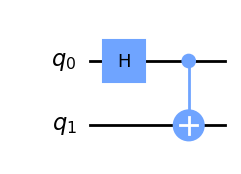

In [42]:
qiskit_circ = QuantumCircuit(2)
qiskit_circ.h(0)
qiskit_circ.cx(0, 1)

qiskit_circ.draw(output='mpl')

In [45]:
from braket.tracking import Tracker

with Tracker() as tracker:
    task = device.run(qiskit_circ, shots=100)

In [46]:
tracker.qpu_tasks_cost()

Decimal('0.3350000000')

In [47]:
isinstance(device, BackendV2)

True

In [ ]:
q_env = QuantumEnvironment(gate_q_env_config)
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, min_action=-1.0, max_action=1.0)
q_env.backend = backend